In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df=pd.read_csv('C:\\Users\\HP\\Downloads\\trainproduct.csv')

In [3]:
test_df=pd.read_csv('C:\\Users\\HP\\Downloads\\testproduct.csv')

In [4]:
print(train_df.shape)
print(test_df.shape)

(61878, 95)
(144368, 94)


In [5]:
train_df.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,...,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1


In [6]:
test_df.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
0,1,0,0,0,0,0,0,0,0,0,...,0,0,11,1,20,0,0,0,0,0
1,2,2,2,14,16,0,0,0,0,0,...,0,0,0,0,0,4,0,0,2,0
2,3,0,1,12,1,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,0,...,0,3,1,0,0,0,0,0,0,0
4,5,1,0,0,1,0,0,1,2,0,...,0,0,0,0,0,0,0,9,0,0


In [7]:
print(train_df.columns)

Index(['id', 'feat_1', 'feat_2', 'feat_3', 'feat_4', 'feat_5', 'feat_6',
       'feat_7', 'feat_8', 'feat_9', 'feat_10', 'feat_11', 'feat_12',
       'feat_13', 'feat_14', 'feat_15', 'feat_16', 'feat_17', 'feat_18',
       'feat_19', 'feat_20', 'feat_21', 'feat_22', 'feat_23', 'feat_24',
       'feat_25', 'feat_26', 'feat_27', 'feat_28', 'feat_29', 'feat_30',
       'feat_31', 'feat_32', 'feat_33', 'feat_34', 'feat_35', 'feat_36',
       'feat_37', 'feat_38', 'feat_39', 'feat_40', 'feat_41', 'feat_42',
       'feat_43', 'feat_44', 'feat_45', 'feat_46', 'feat_47', 'feat_48',
       'feat_49', 'feat_50', 'feat_51', 'feat_52', 'feat_53', 'feat_54',
       'feat_55', 'feat_56', 'feat_57', 'feat_58', 'feat_59', 'feat_60',
       'feat_61', 'feat_62', 'feat_63', 'feat_64', 'feat_65', 'feat_66',
       'feat_67', 'feat_68', 'feat_69', 'feat_70', 'feat_71', 'feat_72',
       'feat_73', 'feat_74', 'feat_75', 'feat_76', 'feat_77', 'feat_78',
       'feat_79', 'feat_80', 'feat_81', 'feat_82', 'fe

In [9]:
#data preprocessing
# 1. handle null values
train_nv=train_df.isnull().sum()
train_nv[train_nv>0]

Series([], dtype: int64)

In [10]:
test_nv=test_df.isnull().sum()
test_nv[test_nv>0]

Series([], dtype: int64)

In [11]:
# 2. handle the duplicates
train_df.duplicated().sum()

0

In [12]:
test_df.duplicated().sum()

0

In [14]:
# 3. checking the data type inconsistencies
train_df.dtypes.value_counts()

int64     94
object     1
dtype: int64

In [15]:
test_df.dtypes.value_counts()

int64    94
dtype: int64

In [17]:
# 4. target variable
train_df['target'].value_counts()

Class_2    16122
Class_6    14135
Class_8     8464
Class_3     8004
Class_9     4955
Class_7     2839
Class_5     2739
Class_4     2691
Class_1     1929
Name: target, dtype: int64

In [19]:
#corerealtion
corr=train_df.corr()

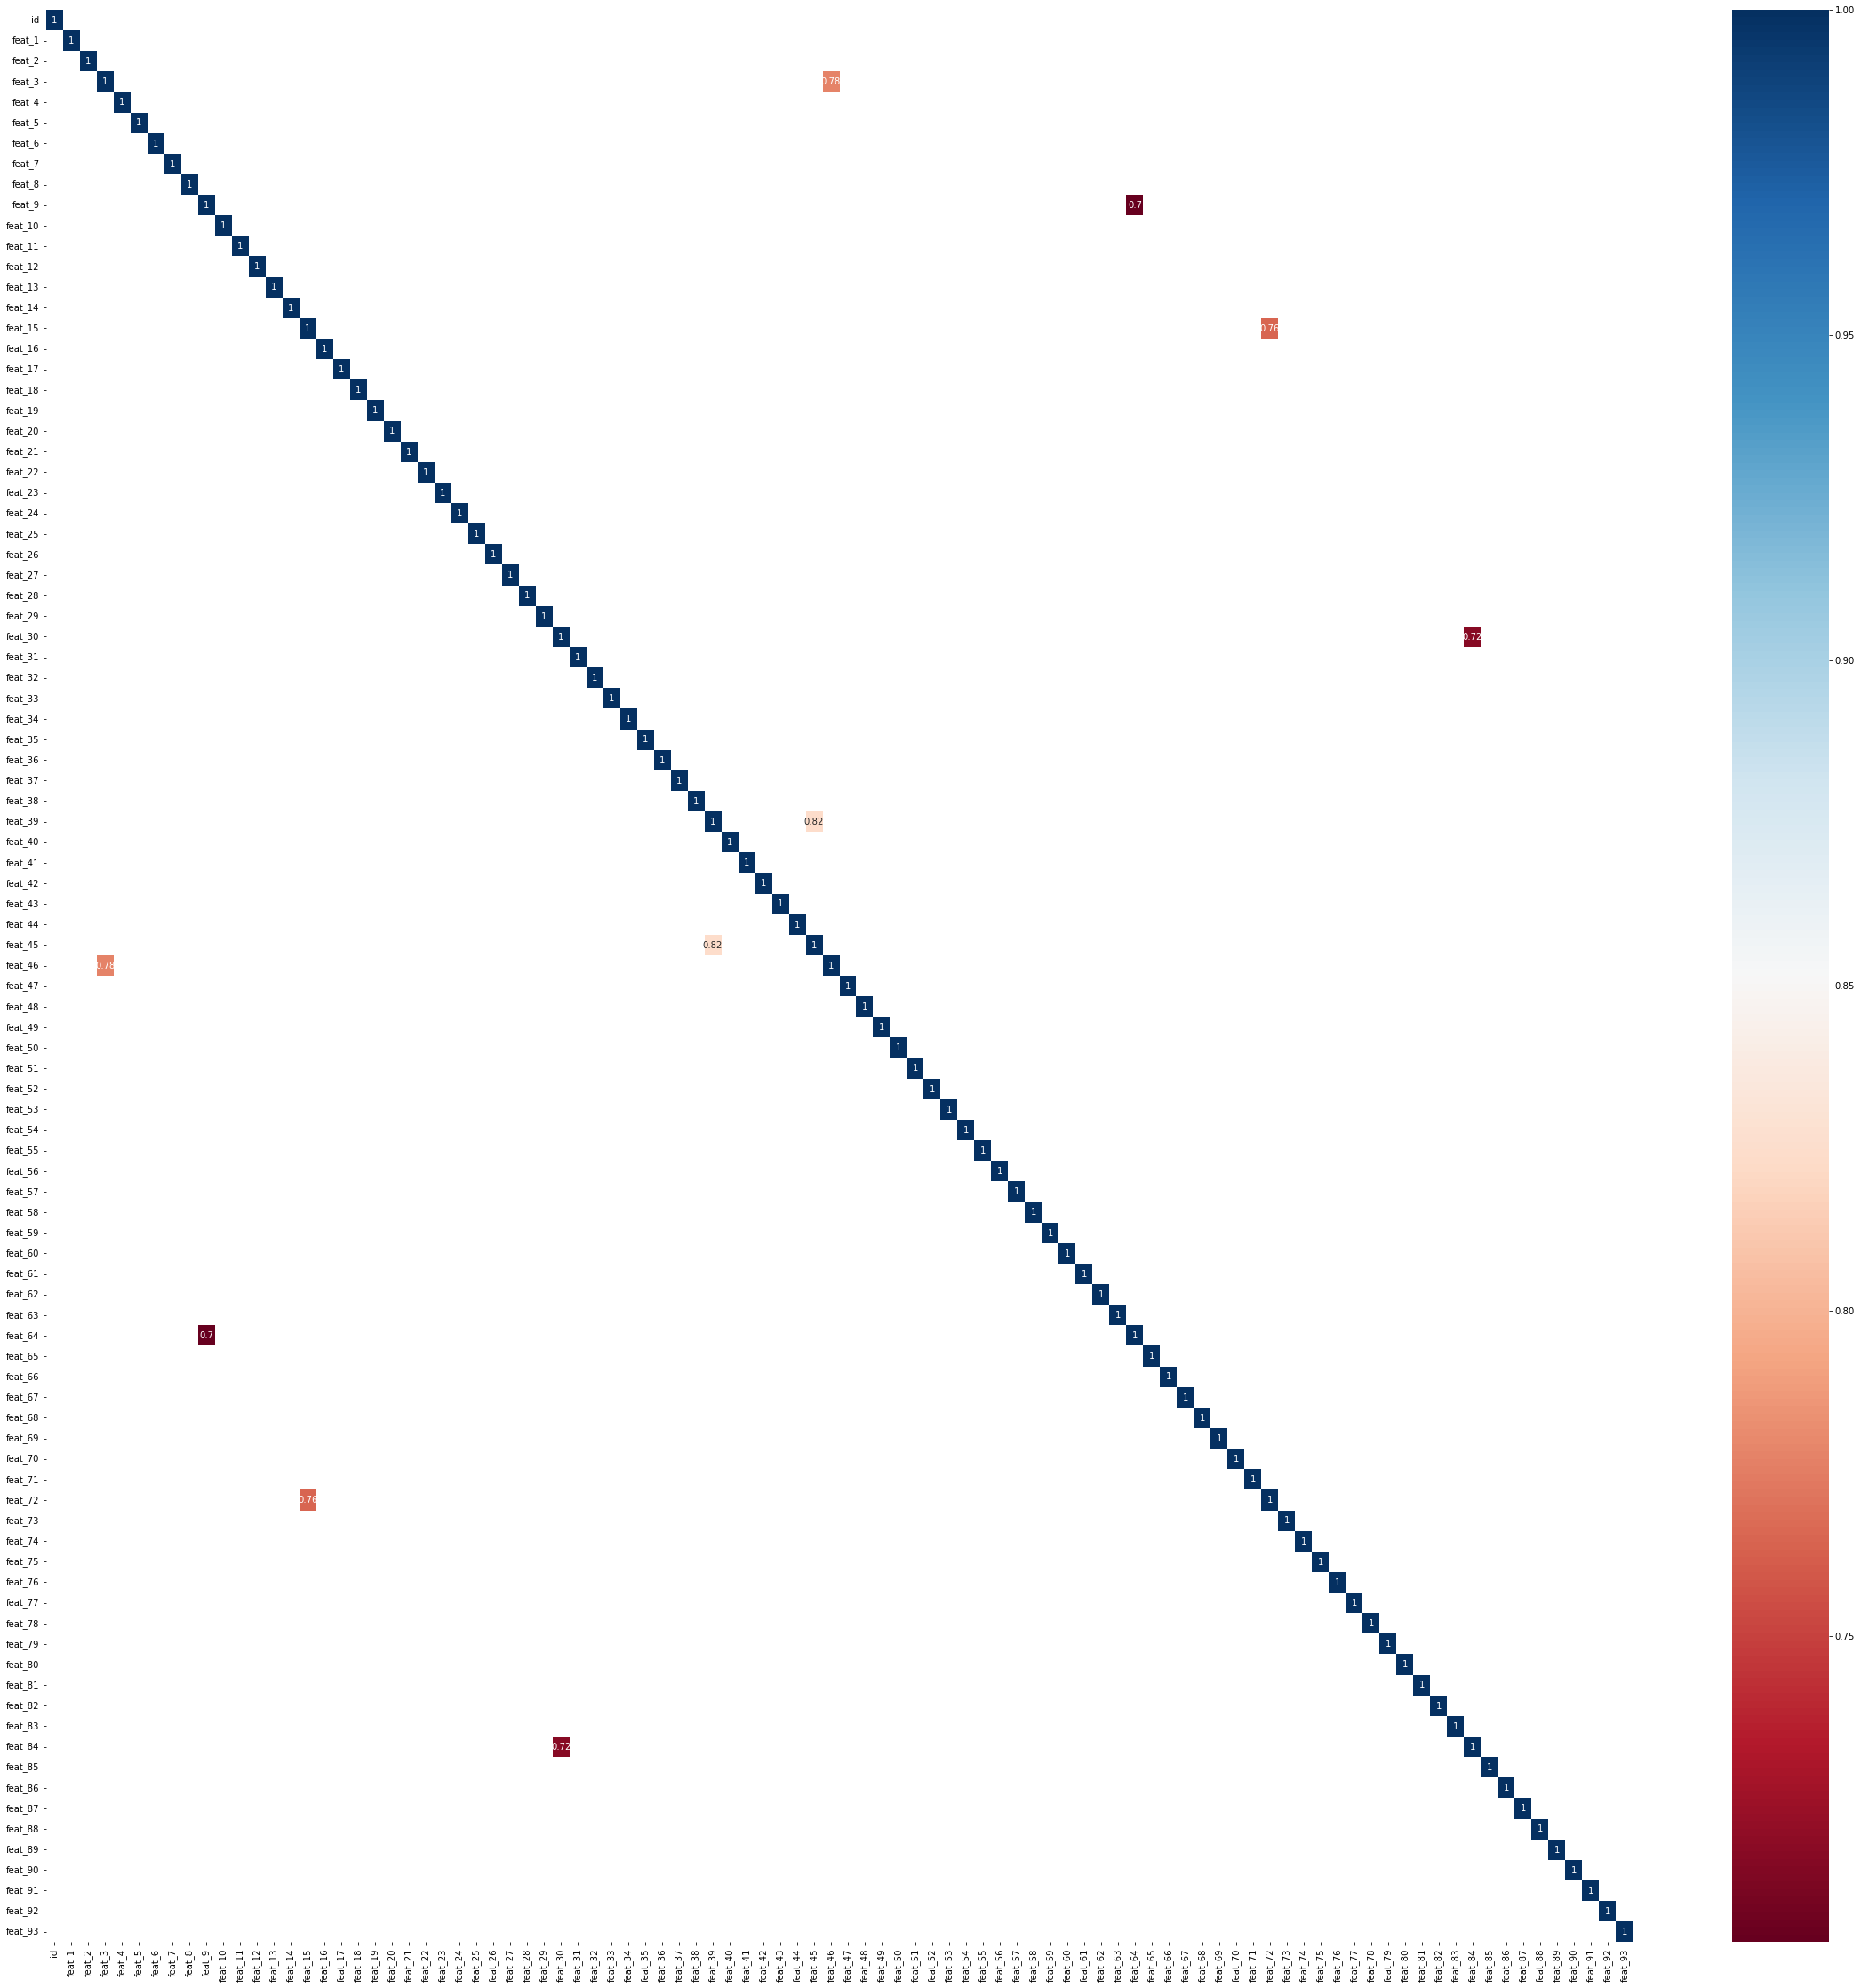

In [21]:
#representing features having corealtion more than 0.7
plt.figure(figsize=(40,40))
sns.heatmap(corr[abs(corr)>0.7],annot=True,cmap='RdBu')
plt.show()

In [22]:
# selecting depenedent and independent features
x=train_df.drop(['id','target'],axis=1)
y=train_df['target']
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(61878, 93)
(61878,)


In [23]:
# splitting the data into tain and test
from sklearn.model_selection import train_test_split

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(43314, 93)
(18564, 93)
(43314,)
(18564,)


In [29]:
# create function to evulate confusion_matrix, classification_matrix, classification_report and to generate train and test score
from sklearn.metrics import confusion_matrix, classification_report

In [43]:
def eval_model(ytest,ypred):
    cm=confusion_matrix(ytest,ypred)
    print('confusion matrix\n',cm)
    print('classification report\n',classification_report(ytest,ypred))
    print('test score',(ytest,ypred))
def mscore(model):
    print('train score',model.score(x_train,y_train))
    print('test score',model.score(x_test,y_test))

In [32]:
# importing libraries for ml models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

In [34]:
# 1. KNN Classifier
Knn1= KNeighborsClassifier(n_neighbors=17)
Knn1.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=17)

In [35]:
mscore(Knn1)

train score 0.7958165950962737
test score 0.7754255548373196


In [44]:
ypred_Knn1=Knn1.predict(x_test)
eval_model(y_test,ypred_Knn1)

confusion matrix
 [[ 277   23    3    0    5   37   15   82  145]
 [   4 4105  615   24   12    5   23    5    7]
 [   0 1235 1068   22    0    4   23    6    3]
 [   1  439  172  139    6   17   11    0    2]
 [   2   19    1    0  816    0    5    1    1]
 [  40   73    9    6    3 3936   58   86   79]
 [  30  112   80    3    9   51  490   63    8]
 [  49   50   14    0    3   67   31 2223   53]
 [  39   51    3    1    7   59    6   51 1341]]
classification report
               precision    recall  f1-score   support

     Class_1       0.63      0.47      0.54       587
     Class_2       0.67      0.86      0.75      4800
     Class_3       0.54      0.45      0.49      2361
     Class_4       0.71      0.18      0.28       787
     Class_5       0.95      0.97      0.96       845
     Class_6       0.94      0.92      0.93      4290
     Class_7       0.74      0.58      0.65       846
     Class_8       0.88      0.89      0.89      2490
     Class_9       0.82      0.86      

In [38]:
# decision tree classifier
dt1=DecisionTreeClassifier(criterion='gini',max_depth=12,min_samples_split=30)
dt1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=12, min_samples_split=30)

In [39]:
mscore(dt1)

train score 0.6851826199381262
test score 0.6715147597500538


In [45]:
ypred_dt1 = dt1.predict(x_test)
eval_model(y_test,ypred_dt1)

confusion matrix
 [[  26  243    2    3    0   37    5  103  168]
 [   4 4106  514   38    5   23    8   43   59]
 [   2 1533  727   27    0    8    8   31   25]
 [   0  467   81  187    4   28    2    4   14]
 [   0   63    0    0  773    0    0    7    2]
 [   7  334   19   20    0 3678   16  103  113]
 [   3  421   45    3    3   59  191   74   47]
 [  25  435   25   10    2   70   12 1789  122]
 [  12  339    8    5    3   67    1  134  989]]
classification report
               precision    recall  f1-score   support

     Class_1       0.33      0.04      0.08       587
     Class_2       0.52      0.86      0.64      4800
     Class_3       0.51      0.31      0.38      2361
     Class_4       0.64      0.24      0.35       787
     Class_5       0.98      0.91      0.95       845
     Class_6       0.93      0.86      0.89      4290
     Class_7       0.79      0.23      0.35       846
     Class_8       0.78      0.72      0.75      2490
     Class_9       0.64      0.63      

In [46]:
# 3. RandomForest Classifier
rf1=RandomForestClassifier(n_estimators=80, criterion='gini',max_depth=12,min_samples_split=18)
rf1.fit(x_train,y_train)

RandomForestClassifier(max_depth=12, min_samples_split=18, n_estimators=80)

In [47]:
mscore(rf1)

train score 0.7449323544350557
test score 0.7266214177978884


In [48]:
ypred_rf1 = rf1.predict(x_test)
eval_model(y_test,ypred_rf1)

confusion matrix
 [[   9  109    0    0    0   83    1  226  159]
 [   0 4655   99    3   10   12    1   16    4]
 [   0 2051  275   10    0    8    1   15    1]
 [   0  639   13  100    4   30    0    1    0]
 [   0   50    0    0  787    3    0    5    0]
 [   0  123    0    0    0 4004   19   96   48]
 [   0  365   11    6    2   84  201  167   10]
 [   0   85    2    0    1   89    0 2292   21]
 [   0  157    0    0    5  110    0  120 1166]]
classification report
               precision    recall  f1-score   support

     Class_1       1.00      0.02      0.03       587
     Class_2       0.57      0.97      0.71      4800
     Class_3       0.69      0.12      0.20      2361
     Class_4       0.84      0.13      0.22       787
     Class_5       0.97      0.93      0.95       845
     Class_6       0.91      0.93      0.92      4290
     Class_7       0.90      0.24      0.38       846
     Class_8       0.78      0.92      0.84      2490
     Class_9       0.83      0.75      

In [49]:
# 4. AdaBoost Classifier
adab1=AdaBoostClassifier(n_estimators=70)
adab1.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=70)

In [50]:
mscore(adab1)

train score 0.6890843607147804
test score 0.6911226028873088


In [51]:
ypred_adab1=adab1.predict(x_test)
eval_model(y_test,ypred_adab1)

confusion matrix
 [[ 103   19    1    2    6   91   26  165  174]
 [   9 3846  563  164   52   23   63   57   23]
 [   4 1447  631  100   21   13   88   49    8]
 [   6  399   71  246    7   28   25    2    3]
 [   0   17    0    1  814    2    1    9    1]
 [  39   46    8   30    2 3953   44  103   65]
 [  48  108   65   14    7  122  342  119   21]
 [ 128   36   17    1    5  241   69 1879  114]
 [ 153   69    2    4    5  124   10  175 1016]]
classification report
               precision    recall  f1-score   support

     Class_1       0.21      0.18      0.19       587
     Class_2       0.64      0.80      0.71      4800
     Class_3       0.46      0.27      0.34      2361
     Class_4       0.44      0.31      0.36       787
     Class_5       0.89      0.96      0.92       845
     Class_6       0.86      0.92      0.89      4290
     Class_7       0.51      0.40      0.45       846
     Class_8       0.73      0.75      0.74      2490
     Class_9       0.71      0.65      

In [52]:
#PCA
from sklearn.decomposition import PCA

In [56]:
pca=PCA(n_components=10)
pcomps_train=pca.fit_transform(x_train)
pcomps_test=pca.fit_transform(x_test)
print(pcomps_train.shape)
print(pcomps_test.shape)

(43314, 10)
(18564, 10)


In [57]:
# applying random forest or PCA results
rf2=RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=25,min_samples_split=30)
rf2.fit(pcomps_train,y_train)

RandomForestClassifier(max_depth=25, min_samples_split=30)

In [58]:
print('Train Score',rf2.score(pcomps_train,y_train))
print('Test Score',rf2.score(pcomps_test,y_test))

Train Score 0.8288313247448862
Test Score 0.5178840767076062


In [59]:
ypred_rf2=rf2.predict(pcomps_test)
eval_model(y_test,ypred_rf2)

confusion matrix
 [[   1   33    7    0    0  343   24  147   32]
 [   0 3795  169    9  121  187   24  116  379]
 [   1 1979  149    7    4   48   31   64   78]
 [   1  621   46    4    8   30    4   34   39]
 [   0   34    1    1    0  784    4   21    0]
 [   0   91   16    0    0 3726   53  365   39]
 [   3  250   40    0    0   80  230  239    4]
 [  13  116   12    1    0  577   33 1610  128]
 [   1   33   10    1    2 1105   11  296   99]]
classification report
               precision    recall  f1-score   support

     Class_1       0.05      0.00      0.00       587
     Class_2       0.55      0.79      0.65      4800
     Class_3       0.33      0.06      0.11      2361
     Class_4       0.17      0.01      0.01       787
     Class_5       0.00      0.00      0.00       845
     Class_6       0.54      0.87      0.67      4290
     Class_7       0.56      0.27      0.37       846
     Class_8       0.56      0.65      0.60      2490
     Class_9       0.12      0.06      

In [60]:
# train the entire data on the best performing model
rf1.fit(x,y)

RandomForestClassifier(max_depth=12, min_samples_split=18, n_estimators=80)

In [61]:
print('Train Score',rf1.score(x,y))

Train Score 0.7444002715019877


In [66]:
test_df.shape

(144368, 94)

In [67]:
test_df1=test_df.copy()

In [68]:
test_df.drop('id',axis=1,inplace=True)
test_df.shape

(144368, 93)

In [70]:
#generating prediction results for test data
ypred_test_df=rf1.predict(test_df)
print(len(ypred_test_df))

144368


In [71]:
submission=pd.DataFrame({'ID':test_df1['id'],'Prediction':ypred_test_df})
submission.head(20)

,ID,Prediction
0,1,Class_4
1,2,Class_6
2,3,Class_6
3,4,Class_2
4,5,Class_9
5,6,Class_3
6,7,Class_8
7,8,Class_2
8,9,Class_2
9,10,Class_2


In [72]:
submission['Prediction'].value_counts()

Class_2    64365
Class_6    34280
Class_8    22915
Class_9    10735
Class_5     5991
Class_3     2837
Class_7     1983
Class_4     1146
Class_1      116
Name: Prediction, dtype: int64

In [73]:
# save this submission file
submission.to_csv('submission_otto_product.csv')

In [74]:
# save the model
import pickle

In [75]:
pickle.dump(rf1,open('otto_product_cls_rf1.pkl','wb')) # wb- write binary 

In [76]:
# load the save model
model=pickle.load(open('otto_product_cls_rf1.pkl','rb')) # rb- read binary

In [77]:
test_df[:5]

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
0,0,0,0,0,0,0,0,0,0,3,...,0,0,11,1,20,0,0,0,0,0
1,2,2,14,16,0,0,0,0,0,0,...,0,0,0,0,0,4,0,0,2,0
2,0,1,12,1,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,1
3,0,0,0,1,0,0,0,0,0,0,...,0,3,1,0,0,0,0,0,0,0
4,1,0,0,1,0,0,1,2,0,3,...,0,0,0,0,0,0,0,9,0,0


In [78]:
pred_top5_test=model.predict(test_df[:5])
pred_top5_test

array(['Class_4', 'Class_6', 'Class_6', 'Class_2', 'Class_9'],
      dtype=object)